## Kaggle Pima Diabetes Prediction Using ANN With PyTorch Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_228_482_diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Seaborn sees categorical feature, So convert 'Outcome' into categorical variable

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Outcome'], axis = 1).values #independent features
y = df['Outcome'].values #dependent features

In [15]:
 
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Libraries from Torch

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
#Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Creating Tensors

In [18]:
df.shape

(768, 9)

In [19]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 8,hidden1 = 20, hidden2 = 20, out_features = 2):
        super(ANN_Model, self).__init__()
        self.fully_connected_layer1 = nn.Linear(input_features, hidden1)
        self.fully_connected_layer2 = nn.Linear(hidden1, hidden2)
        self.output_layer = nn.Linear(hidden2, out_features)
        
    def forward_propogation(self, x):
        x = F.relu(self.fully_connected_layer1(x))
        x = F.relu(self.fully_connected_layer2(x))
        x = self.output_layer(x)
        return x

In [20]:
#instantiate the ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [21]:
model.parameters()

<generator object Module.parameters at 0x1a31901d68>

## Backward propogation

In [22]:
#Define the loss function
loss_function = nn.CrossEntropyLoss()

#Stochastic Optimization with learning rate of 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Now trigger the backward propogation

In [23]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward_propogation(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)

    if i % 10 == 1:
        print("Epoch number:{} and the loss {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        

Epoch number:1 and the loss 3.457212209701538
Epoch number:11 and the loss 0.8019211888313293
Epoch number:21 and the loss 0.6090323328971863
Epoch number:31 and the loss 0.5917770862579346
Epoch number:41 and the loss 0.5679707527160645
Epoch number:51 and the loss 0.5529038906097412
Epoch number:61 and the loss 0.5410096645355225
Epoch number:71 and the loss 0.5310390591621399
Epoch number:81 and the loss 0.522036075592041
Epoch number:91 and the loss 0.5135970711708069
Epoch number:101 and the loss 0.5061254501342773
Epoch number:111 and the loss 0.4983411729335785
Epoch number:121 and the loss 0.49605467915534973
Epoch number:131 and the loss 0.4828636944293976
Epoch number:141 and the loss 0.47560378909111023
Epoch number:151 and the loss 0.4799226224422455
Epoch number:161 and the loss 0.4793088436126709
Epoch number:171 and the loss 0.46500349044799805
Epoch number:181 and the loss 0.45821481943130493
Epoch number:191 and the loss 0.45270466804504395
Epoch number:201 and the los

Now, Plot the loss function and see the converges

Text(0.5, 0, 'Epoch')

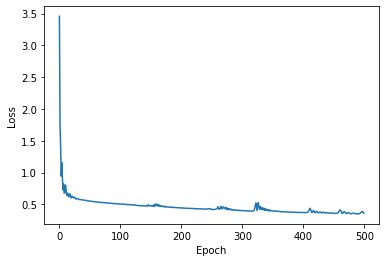

In [24]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [25]:
model.parameters()

<generator object Module.parameters at 0x1a31946660>

In [26]:
X_test

tensor([[1.0000e+00, 1.9900e+02, 7.6000e+01,  ..., 4.2900e+01, 1.3940e+00,
         2.2000e+01],
        [2.0000e+00, 1.0700e+02, 7.4000e+01,  ..., 3.3600e+01, 4.0400e-01,
         2.3000e+01],
        [4.0000e+00, 7.6000e+01, 6.2000e+01,  ..., 3.4000e+01, 3.9100e-01,
         2.5000e+01],
        ...,
        [4.0000e+00, 1.4200e+02, 8.6000e+01,  ..., 4.4000e+01, 6.4500e-01,
         2.2000e+01],
        [3.0000e+00, 1.1600e+02, 7.4000e+01,  ..., 2.6300e+01, 1.0700e-01,
         2.4000e+01],
        [1.0000e+00, 1.0700e+02, 7.2000e+01,  ..., 3.0800e+01, 8.2100e-01,
         2.4000e+01]])

In [ ]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()


In [ ]:
### Predcition of new data point
list(df.iloc[0,:-1])

In [ ]:
new_data=torch.tensor(lst1)


In [ ]:

#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())